In [11]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np
import difflib
import spacy
import spacy.cli
import nltk
# spacy.cli.download("en_core_web_sm")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [122]:
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_laptops.json', 'r') as f:
    data = json.load(f)
# data[0]
print(len(data[0]['reviews']))

5


In [125]:
for j, product in enumerate(data):
    helpful = 0
    unhelpful = 0
    for i, review in enumerate(product['reviews']):
        if review['review_helpfulness'] == 1:
            helpful += 1
        elif review['review_helpfulness'] == 0:
            unhelpful += 1
    print(j, i)
    print(f"score: {helpful}, {unhelpful}")

0 4
score: 5, 0
1 0
score: 1, 0
2 2
score: 3, 0
3 0
score: 1, 0
4 0
score: 1, 0
5 2
score: 3, 0
6 3
score: 4, 0
7 3
score: 4, 0
8 2
score: 3, 0
9 4
score: 5, 0
10 2
score: 3, 0
11 0
score: 1, 0
12 0
score: 1, 0
13 2
score: 3, 0
14 0
score: 1, 0
15 1
score: 2, 0
16 2
score: 3, 0
17 93
score: 94, 0
18 9
score: 2, 8
19 1
score: 2, 0
20 3
score: 4, 0
21 3
score: 4, 0
22 0
score: 1, 0
23 6
score: 7, 0
24 2
score: 3, 0
25 92
score: 93, 0
26 6
score: 6, 1
27 6
score: 5, 2
28 24
score: 25, 0
29 4
score: 5, 0
30 45
score: 46, 0
31 6
score: 7, 0
32 0
score: 1, 0
33 30
score: 31, 0
34 6
score: 7, 0
35 23
score: 24, 0
36 19
score: 20, 0
37 9
score: 10, 0
38 0
score: 1, 0
39 5
score: 6, 0
40 1
score: 2, 0
41 19
score: 19, 1
42 5
score: 6, 0
43 1
score: 1, 1
44 0
score: 1, 0
45 0
score: 1, 0
46 1
score: 2, 0
47 0
score: 1, 0
48 4
score: 5, 0


In [129]:
# for index in range(len(data)):
def get_topics(index):
    positive_topics = []
    negative_topics = []
    fakeReviews = 0
    realReviews = 0
    for i in range(len(data[index]['reviews'])):
        if data[index]['reviews'][i]['sentiment_scores'] > 0:
            realReviews += 1
        elif data[index]['reviews'][i]['sentiment_scores'] <= 0:
            fakeReviews += 1
        if data[index]["reviews"][i]['review_helpfulness'] == 1 and data[index]['reviews'][i]['sentiment_scores'] > 0:
            for j in range(len(data[index]["reviews"][i]['review_topics'])):
                positive_topics.append(data[index]["reviews"][i]['review_topics'][j])
        elif data[index]["reviews"][i]['review_helpfulness'] ==1 and data[index]['reviews'][i]['sentiment_scores'] <= 0:
            for j in range(len(data[index]["reviews"][i]['review_topics'])):
                negative_topics.append(data[index]["reviews"][i]['review_topics'][j])
    return positive_topics, negative_topics, data[index]['product_title'], realReviews, fakeReviews


positive_topics, negative_topics, title, realReviews, fakeReviews = get_topics(25)
positive_topics = [topic for topic in positive_topics if topic != 'none']
negative_topics = [topic for topic in negative_topics if topic != 'none']
(positive_topics), (negative_topics), title, realReviews, fakeReviews

(['ASUS N61JQ-A1',
  'dark brown',
  'extravagant',
  'return policy',
  'ASUS G51',
  'games',
  'screen resolution',
  'Asus 24/7 tech support',
  'device manager',
  'bios update',
  'language barriers',
  'machine recommendation',
  'over 5 year lifespan',
  'Used while traveling',
  'usb 3',
  'Asus K52JR-A1',
  'low resolution',
  'bloatware',
  'graphic card',
  'core i7 720q',
  'usb 3.0',
  'fingerprint magnet',
  'Asus',
  'disappointed',
  'ASUS N61JQ-A1',
  'black screen',
  'portable laptop',
  'Asus hotline',
  'Asus laptop',
  'desktop replacement',
  'cooling system',
  'USB 3.0',
  'RAM',
  'good value',
  'quiet hard drive',
  'chiclet style keyboard',
  'wifi antenna',
  'weak speakers',
  'fan',
  'backlit keyboard',
  'high resolution',
  '9-cell battery',
  'good gaming laptop',
  'Dell notebooks',
  'Windows 7',
  'user-friendly',
  'portal-2',
  'skyrim',
  'windows 7',
  'windows 8',
  'windows 8.1',
  'windows XP',
  'windows 7',
  'Asus named software',
  'ke

In [55]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())  # Convert to lowercase for consistency
    return synonyms

# syn = list(get_synonyms(topics[9]))
# syn

In [90]:
def are_phrases_similar(text1, text2, threshold=0.5):
    # Initialize CountVectorizer to convert text to bag-of-words vectors
    vectorizer = CountVectorizer()

    # Fit and transform the text
    X = vectorizer.fit_transform([text1, text2])

    # Compute cosine similarity
    cosine_sim = cosine_similarity(X)

    # Check if cosine similarity is above the threshold
    is_similar = cosine_sim[0, 1] > threshold

    return is_similar

In [91]:
def are_similar(a, b, threshold=0.6):
    """
    Check if two strings are similar based on token similarity.
    """
    seq = difflib.SequenceMatcher(None, a, b)
    ratio = seq.ratio()
    # print(seq.ratio(), a, b)
    return ratio > threshold

In [59]:
def count_phrase_frequency_in_array(unique_array, original_array):
    frequency_counter = Counter()
    topicsCount = 0
    for i, phrase1 in enumerate(unique_array):
        count = 1
        for j, phrase2 in enumerate(original_array):
            if i != j:  # Avoid comparing a phrase with itself
                if not are_phrases_similar(phrase1.lower(), phrase2.lower()):
                    count += 1
        frequency_counter[phrase1] = count
        topicsCount += 1
        print(topicsCount)
        # for phrase in original_array:
        #     if are_phrases_similar(phrase.lower(), phrase1.lower()):
        #         frequency_counter[phrase1] = count
    return frequency_counter


def get_unique(phrase_array):
    unique_pair = []
    count = 0
    for i in range(len(phrase_array)):
        for j in range(i+1, len(phrase_array)):
            if not are_phrases_similar(phrase_array[i], phrase_array[j]):
                # print(phrase_array[i], phrase_array[j])
                unique_pair.append(phrase_array[j])
        count += 1
        print(count)
    return unique_pair

In [92]:
# unique_positive = get_unique(positive_topics)
# unique_negative = get_unique(negative_topics)
new_pos = [word.lower() for word in positive_topics]
new_neg = [word.lower() for word in negative_topics]
frequency_positive = count_phrase_frequency_in_array(set(new_pos), set(new_pos))
frequency_negative = count_phrase_frequency_in_array(set(new_neg), set(new_neg))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [93]:
frequency_positive


Counter({'dragons age': 331,
         'quality control': 331,
         'medium settings': 331,
         'dark brown': 331,
         'college student': 331,
         'dual boot': 331,
         'power-saver mode': 331,
         'unreliable parts': 331,
         'happy with this laptop': 331,
         'realtemp.exe': 331,
         'arctic silver': 331,
         'media reader': 331,
         'video editor': 331,
         'professional look': 331,
         'good balance': 331,
         'loud whine': 331,
         'wifi antenna': 331,
         'engineering major': 331,
         'bluescreening': 331,
         'sound system': 331,
         'cheap lighting': 331,
         'ddr3 memories': 331,
         '1333 mhz bus': 331,
         'price over $1000.00': 331,
         'viewing angle': 331,
         'outdated product': 331,
         'go force 7800': 331,
         'finger magnet': 331,
         'ableton live': 331,
         'asus es lo mã¡ximo.': 331,
         'firefox': 331,
         'multi-fing

In [94]:
# topics = []
for index in range(len(data)):
    data[index]['topic_frequency'] = []
    if index == 17:
        # for i in range(len(data[index]['reviews'])):
        # print(f"{(list(set(unique)))}\n{(dict(frequency))}")
        
        
        freq_pos = dict(frequency_positive)
        freq_neg = dict(frequency_negative)
        new_pos = len(freq_pos)
        new_neg = len(freq_neg)
        temp_pos = []
        temp_neg = []
        for key, value in freq_pos.items():
            print(f"value: {value}\ntotal: {new_pos}\nresult: {(value/(new_pos+new_neg))*100}")
            temp_pos.append({'topic': key, 'freq': (float((value/(new_pos+new_neg))*100))})
        for key, value in freq_neg.items():
            temp_neg.append({'topic': key, 'freq': (float((value/(new_pos+new_neg))*100))})
        sorted_freq_pos = sorted(temp_pos, key=lambda x: x['freq'], reverse=True)
        sorted_freq_neg = sorted(temp_neg, key=lambda x: x['freq'], reverse=True)
        print(sorted_freq_pos)
        print(sorted_freq_neg)
        x_pos = []
        x_neg = []
        y_pos = []
        y_neg = []
        for k in sorted_freq_pos[0: 20]:
            x_pos.append(k['topic'])
            y_pos.append(k['freq'])
        for k in sorted_freq_neg[0: 20]:
            x_neg.append(k['topic'])
            y_neg.append(k['freq'])
            # print(k['freq'])
# unique

value: 329
total: 331
result: 80.04866180048663
value: 330
total: 331
result: 80.2919708029197
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 324
total: 331
result: 78.83211678832117
value: 330
total: 331
result: 80.2919708029197
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 330
total: 331
result: 80.2919708029197
value: 330
total: 331
result: 80.2919708029197
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 328
total: 331
result: 79.80535279805353
value: 330
total: 331
result: 80.2919708029197
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 331
total: 331
result: 80.5352798053528
value: 331

20


C:\Users\GS\AppData\Local\Temp\ipykernel_14048\1523493075.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


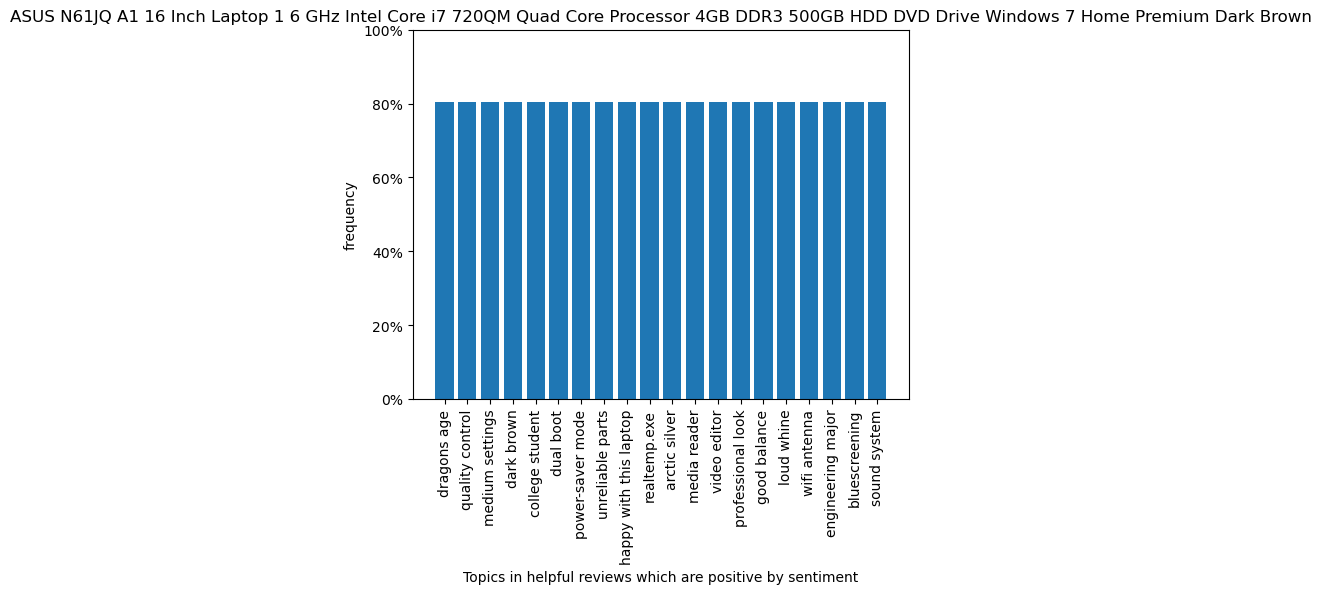

In [95]:
print(len(y_pos))
fig, ax = plt.subplots()
bars = ax.bar(x_pos, y_pos)
scaled_y = [val / max(y_pos) * 100 for val in y_pos]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')
plt.xlabel('Topics in helpful reviews which are positive by sentiment')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()


20


C:\Users\GS\AppData\Local\Temp\ipykernel_14048\4216886867.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


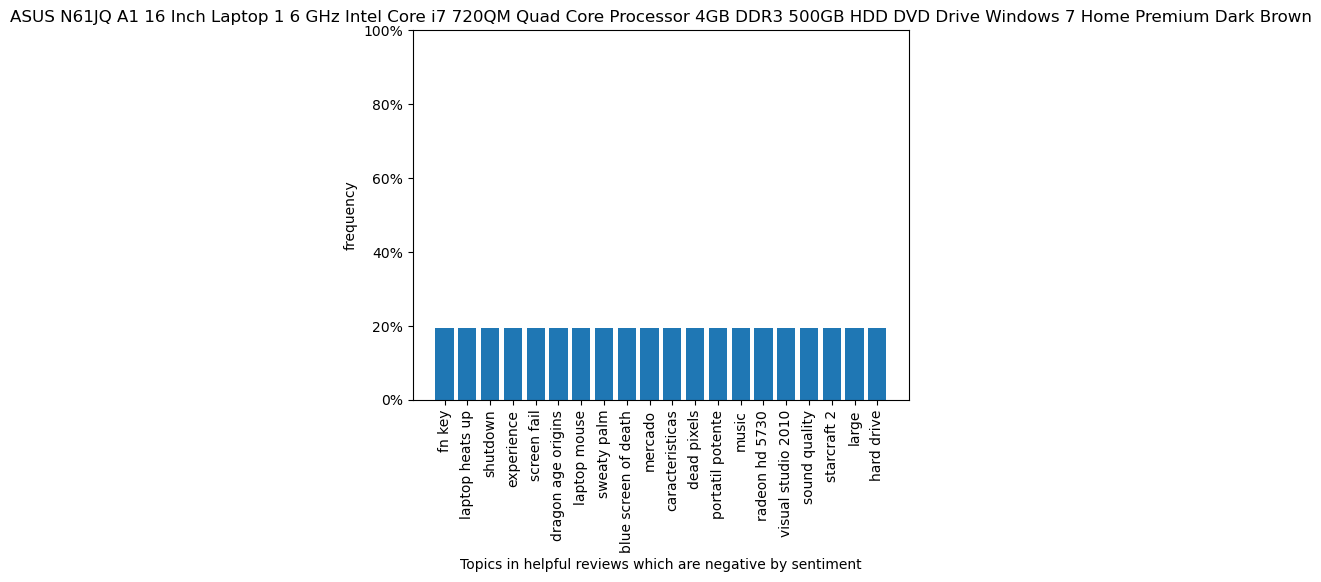

In [96]:
print(len(y_neg))
fig, ax = plt.subplots()
bars = ax.bar(x_neg, y_neg)
scaled_y = [val / max(y_neg) * 100 for val in y_neg]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')

plt.xlabel('Topics in helpful reviews which are negative by sentiment')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()


['Positive Reviews', 'Negative Reviews']


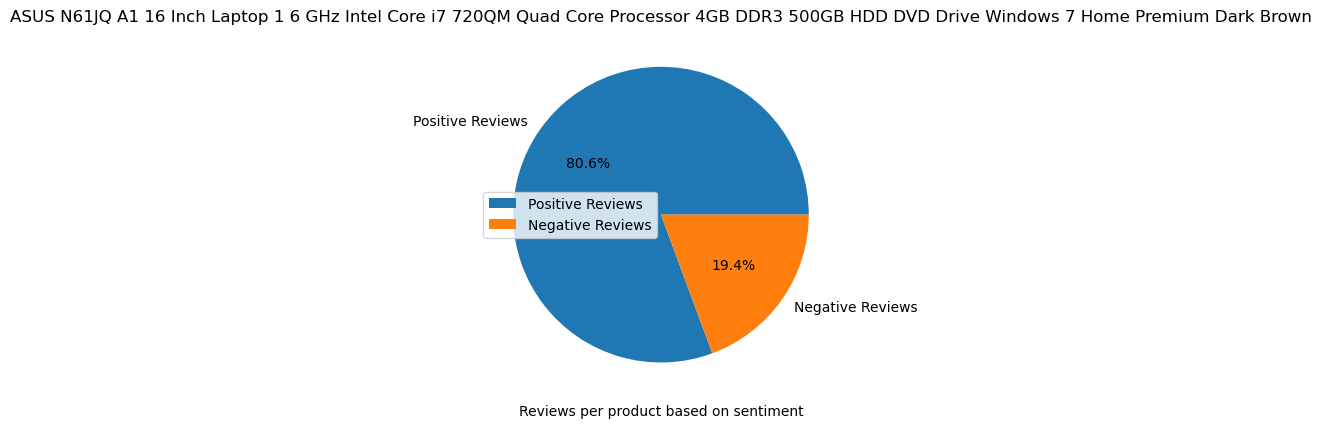

In [97]:
# indices = np.arange(len(x))

pie_array = [realReviews, fakeReviews]
pie_labels = ['Positive Reviews', 'Negative Reviews']
# Calculate total value
total = sum(pie_array)

# Concatenate total value with labels
labels_with_total = [f'{label}' for label, size in zip(pie_labels, pie_array)]
# labels_with_total.append(f'Total: {total}')
print(labels_with_total)
plt.pie(pie_array, labels=labels_with_total, autopct='%1.1f%%')

plt.xlabel('Reviews per product based on sentiment')
plt.title(title)
plt.legend(loc='best', fontsize='medium')
# plt.legend()

plt.grid()
plt.show()